# AIM : To train the model with optimized parameters

In [99]:
# TODO: MAKE NECESSARY IMPORTS
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [119]:
# TODO: CREATE AN INSTANCE OF CLASSIFIERS
KNN = KNeighborsClassifier(n_jobs=-1)
SVM = SVC(probability=True, random_state=42)
RFC = RandomForestClassifier(n_jobs=-1)
LOG = LogisticRegression(n_jobs=-1, solver="saga")

In [10]:
# TODO: IMPORT THE DATASETS
X_train = pd.read_csv("../Data/X_train_res.csv")
X_test = pd.read_csv("../Data/X_test.csv")
y_train = pd.read_csv("../Data/y_train_res.csv")
y_test = pd.read_csv("../Data/y_test.csv")

In [18]:
# TODO: SELECT THE OPTIMAL FEATURES
opt_features = ['age',
               'hypertension',
               'heart_disease',
               'Residence_type',
               'avg_glucose_level',
               'bmi',
               'Self-employed',
               'formerly smoked',
               'never smoked',
               'smokes']
X_train = X_train[opt_features]
X_test = X_test[opt_features]

- These are the features selected using Sequential Feature Selection

In [20]:
X_train.head(5)

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,Self-employed,formerly smoked,never smoked,smokes
0,1.733845,1,0,0,-0.989938,-0.775637,0,0,1,0
1,1.153296,0,0,0,2.699503,1.025293,1,0,1,0
2,0.483432,0,0,1,2.301763,1.243978,0,0,1,0
3,0.349459,0,0,0,0.003512,0.497878,0,0,1,0
4,-1.704791,0,0,0,-0.690283,-1.225869,0,0,0,0


In [95]:
# Helper function for plotting
def plot_graphs(clf,test_x, test_y, name):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    ax[0].set_title(f"Confusion Matrix for {name}")
    ax[1].set_title("ROC/AUC")
    plot_confusion_matrix(clf, X_test, y_test, colorbar=False, ax=ax[0])
    plot_roc_curve(clf, X_test, y_test, ax=ax[1])

---

# Training

## K-NEIGHBORS CLASSIFIER

### Best Parameters

In [109]:
knn_params = {'n_neighbors': [5, 6, 7, 8, 9, 10]}
knn_grid = GridSearchCV(estimator=KNN, param_grid=knn_params, cv=10, scoring="roc_auc", n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'n_neighbors': 5}

### Training with best parameters

In [110]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
y_hat = KNN.predict(X_test)
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       952
           1       0.43      0.08      0.14       228

    accuracy                           0.80      1180
   macro avg       0.62      0.53      0.51      1180
weighted avg       0.74      0.80      0.74      1180



### Model Performance

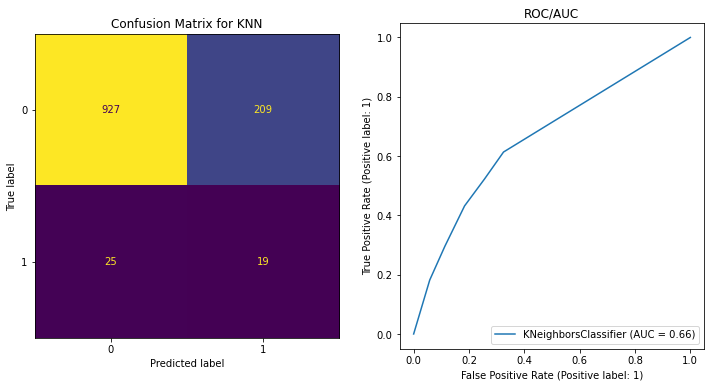

In [111]:
plot_graphs(KNN, X_test, y_test, "KNN")

---

## SUPPORT VECTOR CLASSIFIER

### Best Parameters

In [106]:
svm_params = {
    "C" : [0.001, 0.01, 0.1, 1.0],
    "kernel" : ['poly', 'rbf', 'sigmoid']
}

In [108]:
svm_grid = GridSearchCV(estimator=SVM, param_grid=svm_params, cv=10, scoring="roc_auc", n_jobs=-1)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 1.0, 'kernel': 'rbf'}

### Training with best parameters

In [112]:
SVM = SVC(probability=True, random_state=42)
SVM.fit(X_train, y_train)
y_hat = SVM.predict(X_test)
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       975
           1       0.39      0.08      0.14       205

    accuracy                           0.82      1180
   macro avg       0.61      0.53      0.52      1180
weighted avg       0.76      0.82      0.77      1180



### Model Performance

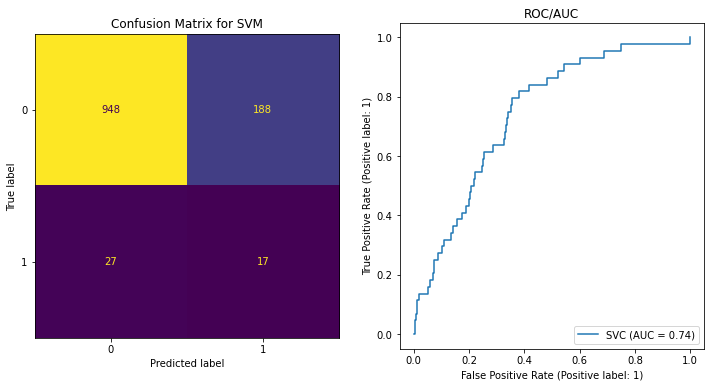

In [113]:
plot_graphs(SVM, X_test, y_test, "SVM")

---

## LOGISTIC RERESSION

In [120]:
LOG.fit(X_train, y_train)
y_hat = LOG.predict(X_test)
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       910
           1       0.61      0.10      0.17       270

    accuracy                           0.78      1180
   macro avg       0.70      0.54      0.52      1180
weighted avg       0.75      0.78      0.71      1180



### Model Performance

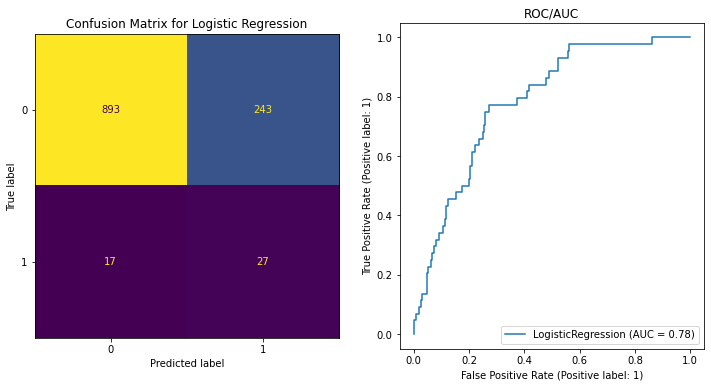

In [123]:
plot_graphs(LOG, X_test, y_test, "Logistic Regression")

---

## RANDOM FOREST CLASSIFIER

### Best Parameters

In [124]:

rf_params = {
    "n_estimators" : [100, 150, 200, 250, 300, 350],
    "criterion" : ["gini", "entropy"]
}
rf_grid = GridSearchCV(estimator=RFC, param_grid=rf_params, cv=10, scoring="roc_auc", n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'criterion': 'gini', 'n_estimators': 350}

### Training with best parameters

In [125]:
RFC = RandomForestClassifier(n_jobs=-1, n_estimators=350)
RFC.fit(X_train, y_train)
y_hat = RFC.predict(X_test)
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1073
           1       0.27      0.11      0.16       107

    accuracy                           0.89      1180
   macro avg       0.59      0.54      0.55      1180
weighted avg       0.86      0.89      0.87      1180



### Model Performance

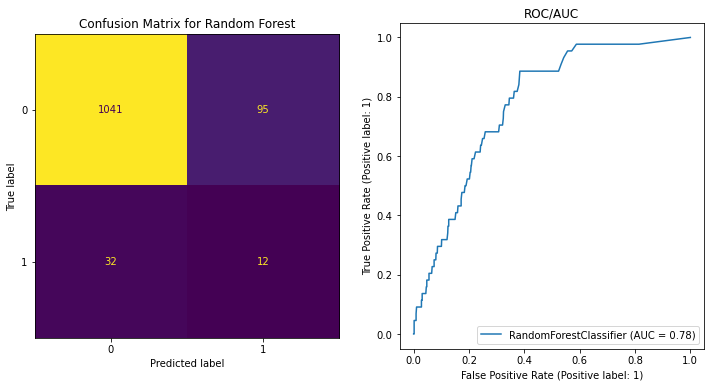

In [126]:
plot_graphs(RFC, X_test, y_test, "Random Forest")

---

# SUMMARY

best performing model is Random Forest

| Model Name | ROC/AUC | Accuracy |
| :- | :-: | :-: |
| K-Neighbors | 0.80 | 0.66 |
| Support Vector | 0.82 | 0.74 |
| Logistic Regression | 0.78 | 0.78 |
| Random Forest | 0.89 | 0.78 |

# SAVE MODEL

The model is saved inside the "Models" directory

In [135]:
import pickle
model = RFC
file_name = "final_model.sav"
pickle.dump(model, open(f"../Models/{file_name}", 'wb'))

# END